### Project Objective 

* Most Frequnt Words in a novel 

### Technology Used 

* Natural Language Processing(NLP)
* Web Scraping 

### Project Details 

* Scrape any novel Moby from the website Project Gutenberg (which contains a large corpus of books) using the Python requests package.
* Extract words from this web data using BeautifulSoup before analyzing the distribution of words using the Natural Language ToolKit (nltk) and Counter
* Visualizing Top-Ten Words using Wordcloud

### Steps to perform

- Request the Novel's HTML file using requests and encoding it to utf-8.

- Extract HTML and create a BeautifulSoup object using an HTML parser to get the text

- Initialize a regex tokenizer to keep only alphanumeric text, assigning the results to tokens.

- Transform the tokens into lowercase, removing English stop words, saving results to words_no_stop.

- Initialize a Counter object and find the ten most common words, savign the results to top_ten and printing to see what they are

- Display the most common words using a Wordcloud
  

### Python Packages Required 

- requests
- bs4
- nltk
- collections
-  re
- matplotlib
- wordcloud


#### URL to Scrape

In [190]:
# url of the book
# Enter the url of the book
url="https://www.gutenberg.org/cache/epub/1661/pg1661-images.html"

### Code 

In [196]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Step-1: Requests and Encode the text 

In [199]:
# Requesting the html page for text 
response=requests.get(url)
# Encoding the text to utf-8 format 
response.encoding='utf-8'

#### Step-2: Extracting the Text 

In [201]:
#Extracting the text and storing in html variable
html=response.text

In [202]:
# First 2000 characters 
html[:2000]

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8"><style>\r\n#pg-header div, #pg-footer div {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    margin-left: 2em;\r\n}\r\n#pg-footer div.agate {\r\n    font-size: 90%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-footer li {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    text-indent: -0.6em;\r\n}\r\n#pg-footer div.secthead {\r\n    font-size: 110%;\r\n    font-weight: bold;\r\n}\r\n#pg-footer #project-gutenberg-license {\r\n    font-size: 110%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-header-heading {\r\n    all: inherit;\r\n    text-align: center;\r\n    font-size: 120%;\r\n    font-weight:bold;\r\n}\r\n#pg-footer-heading {\r\n    all: inherit;\r\n    text-align: center;\r\n    font-size: 120%;\r\n    font-weight: normal;\r\n 

#### Step-3 : Create a Beautifulsoup object and get the text

In [207]:
# Creating a BeautifulSoup object from the html
html_soup=BeautifulSoup(html,"html.parser")

In [258]:
# Extracting the text from the html 
novel_text=html_soup.get_text()
novel_text[:500] 

'\n\n\n\r\n      The Adventures of Sherlock Holmes | Project Gutenberg\r\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nThe Proj'

In [256]:
# Getting the book title and storing it for future reference 
import re
match = re.search(r'[\w\s]+(?=\s*\|)',novel_text)
if match:
    book_title = match.group(0).strip()
    print(book_title)

The Adventures of Sherlock Holmes


#### Step-4 :Tokenize the Text 

In [212]:
# Creating a tokenizer object with an regular expression of extracting only alphanumric values 
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
# Tokenizing the text based on the regular expression and storing it in tokens
tokens=tokenizer.tokenize(novel_text)
len(tokens)

109130

#### Step-5:Convert words to lowercase 

In [215]:
# Converting the words to lowercase 
words=[word.lower() for word in tokens]
# printing out the first 8 words 
words[:8]

['the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'project',
 'gutenberg',
 'the']

#### Step-6: Loading the Stop-Words

In [218]:
#
print(nltk.corpus.stopwords.words('english'))
#len(nltk.corpus.stopwords.words('english'))
stop_words=nltk.corpus.stopwords.words('english')

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

#### Step-7 : Remove Stop Words from text

In [221]:
# length of the whole text before removing stop words
len(words)

109130

In [223]:
# Removing the stop words and storing in words_no_stop
words_no_stop=[word for word in words if word not in stop_words]

In [225]:
len(words_no_stop)

49060

#### Step-8 : Count Frequency Of Words 

In [228]:
# Initializing Counter object 
count=Counter(words_no_stop)
# Storing the 10 most common words along with their frequency
top_ten=count.most_common(10)

In [230]:
# Displaying most common words 
print(top_ten)

[('said', 486), ('holmes', 467), ('upon', 467), ('one', 378), ('would', 327), ('man', 305), ('could', 287), ('mr', 275), ('little', 269), ('see', 232)]


In [232]:
# Only the words
words_list=[var[:][0] for var in top_ten]

In [234]:
words_list

['said',
 'holmes',
 'upon',
 'one',
 'would',
 'man',
 'could',
 'mr',
 'little',
 'see']

#### Step-9: Creating a Word Cloud 

In [237]:
words_list

['said',
 'holmes',
 'upon',
 'one',
 'would',
 'man',
 'could',
 'mr',
 'little',
 'see']

In [239]:
# Joining the words in list to form a whole string 
whole_string=' '.join(words_list)

In [241]:
# Generating the wordcloud Image
wordcloud=WordCloud(background_color='white',width=600,height=300).generate(whole_string)

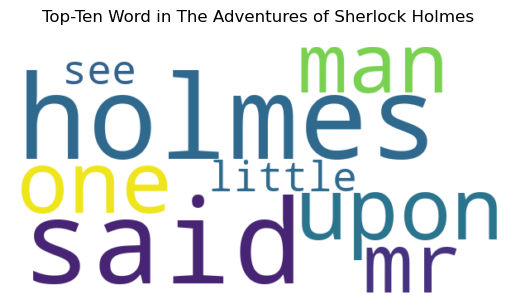

In [260]:
# Showing the image
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title(f'Top-Ten Word in {book_title}\n')
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

#### Saving this image 

In [268]:
# Save the image in the img folder:
wordcloud.to_file(f'Top-10-words in {book_title}.png')